## Задание 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
x=[0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
   0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,
   0.18888889,0.1969697,0.20505051,0.21313131,0.22121212,
   0.22929293,0.23737374,0.24545455,0.25353535,0.26161616,
   0.26969697,0.27777778,0.28585859,0.29393939,0.3020202,
   0.31010101,0.31818182,0.32626263,0.33434343,0.34242424,
   0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
   0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,
   0.43131313,0.43939394,0.44747475,0.45555556,0.46363636,
   0.47171717,0.47979798,0.48787879,0.4959596,0.5040404,
   0.51212121,0.52020202,0.52828283,0.53636364,0.54444444,
   0.55252525,0.56060606,0.56868687,0.57676768,0.58484848,
   0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
   0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,
   0.67373737,0.68181818,0.68989899,0.6979798,0.70606061,
   0.71414141,0.72222222,0.73030303,0.73838384,0.74646465,
   0.75454545,0.76262626,0.77070707,0.77878788,0.78686869,
   0.79494949,0.8030303,0.81111111,0.81919192,0.82727273,
   0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
   0.87575758,0.88383838,0.89191919,0.9]

y = [-2.24812911, -2.30215341, -2.34463875, -2.38651064,
     -2.43190693, -2.44713884, -2.49003176, -2.51006098, 
     -2.55831541, -2.57056931, -2.59340317, -2.64026441, 
     -2.65975636, -2.69517476, -2.71046599, -2.74422696, 
     -2.76251291, -2.79505506, -2.79301352, -2.82852207, 
     -2.854651, -2.88654236, -2.92345136, -2.91943321, 
     -2.94240833, -2.9487781, -2.97926813, -2.99198343, 
     -3.03396292, -3.03814694, -3.04944858, -3.07196161, 
     -3.09883706, -3.11338258, -3.11898122, -3.14254571, 
     -3.18330957, -3.17453301, -3.20021237, -3.21213539, 
     -3.23715191, -3.24017664, -3.23640684, -3.26147762, 
     -3.28208909, -3.29453546, -3.31160478, -3.33188752, 
     -3.33320305, -3.35238927, -3.34176317, -3.37471911, 
     -3.37543159, -3.40452694, -3.40505804, -3.43358858, 
     -3.43596139, -3.43705603, -3.45264647, -3.46029402, 
     -3.45723979, -3.4720453, -3.47597438, -3.4795529, 
     -3.50118552, -3.5031452, -3.5097196, -3.51083668, 
     -3.51128397, -3.52708836, -3.5222885, -3.53317295, 
     -3.50965143, -3.51939652, -3.51659198, -3.50734187, 
     -3.50882329, -3.48129755, -3.49384658, -3.48813707, 
     -3.48345018, -3.46180698, -3.44784696, -3.42372263, 
     -3.39080674, -3.37867045, -3.35281766, -3.32575498, 
     -3.28934964, -3.26814804, -3.23547615, -3.1707224, 
     -3.12910072, -3.09300443, -3.02523152, -2.9453774, 
     -2.89454317, -2.83662685, -2.75433056, -2.68946573]

In [5]:
def func(x, w1, w2, w3, w4):
    return (w1*np.power(x,w2) + w3*np.power(x,w4))

In [6]:
x_train, x_test = train_test_split(x, test_size = 0.3, random_state=4)
y_train, y_test = train_test_split(y, test_size = 0.3, random_state=4)

Разделим на обучающую и тестирующую выборки

In [7]:
p_opt, p_cov = curve_fit(func, x_train, y_train, p0=np.zeros(shape=(4)))
p_opt

array([ 2.96844342,  8.50880072, -3.99732426,  0.24939178])

Получим среднюю сумму квадратов отклонений для тестовой выборки

In [8]:
y_pred = func(x_test, p_opt[0], p_opt[1], p_opt[2], p_opt[3])  # Можно еще сделать через *p_opt
mean_squared_error(y_pred, y_test)

8.659221674193066e-05

Полученный результат для MSE показывает, что модель хорошо предсказывает тестовую выборку, а значит нет переобучения на обучающей выборке (модель не теряет предсказательной способности)

Ну и построим графики для визуализации:

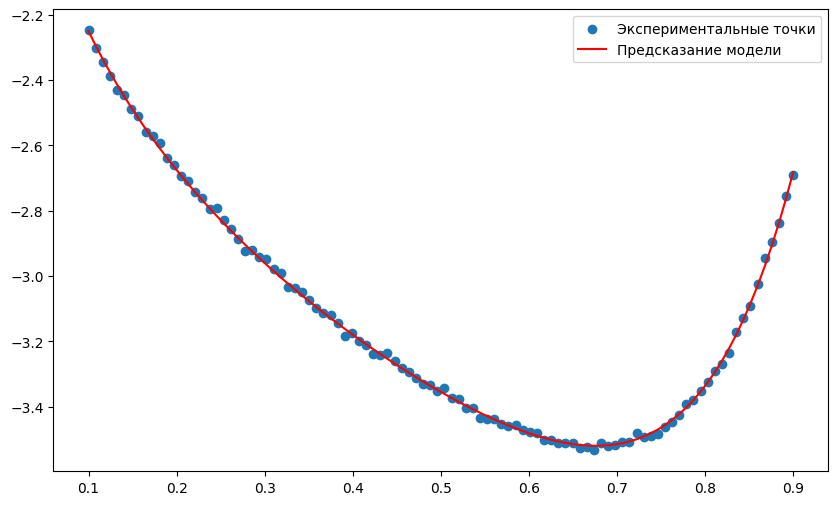

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(x, y, label = 'Экспериментальные точки')
plt.plot(x,func(x,p_opt[0], p_opt[1], p_opt[2], p_opt[3]), color = 'red', label = 'Предсказание модели')
plt.legend()
plt.show()

## Задание 2

$$ f(x)=2x^2-\ln x , f(t)=(t-5)e^t $$

In [10]:
def f_x(x):
    return 2*x**2-np.log(x)

def f_t(t):
    return (t-5)*np.exp(t)

Сделаем дихотомию:

In [11]:
epsilon = 1e-5  # Фиксируем малый эпсилон

def dicho(epsilon, a, b, func):
    s = 0
    while b-a > epsilon:
        c=(a+b)/2
        if func(c-epsilon) < func(c+epsilon):
            b = c
        else:
            a = c
        s+=1
    return (b+a)/2, s

In [12]:
def fibo_sequence(n):  # n>=0!!
    if n <= 1:
        return 1
    else: 
        return fibo_sequence(n-1)+fibo_sequence(n-2)

In [35]:
def fibo(a, b, N, func):
    n = N
    x_1 = a + (b-a)*(fibo_sequence(n-2)/fibo_sequence(n))
    x_2 = a + (b-a)*(fibo_sequence(n-1)/fibo_sequence(n))
    f_1 = func(x_1)
    f_2 = func(x_2)

    while n > 2:
        n-=1
        if f_1 > f_2:
            a = x_1
            x_1 = x_2
            x_2 = a + (b-a)*(fibo_sequence(n-1) / fibo_sequence(n)) 
            f_1 = f_2
            f_2 = func(x_2)
        else:
            b = x_2
            x_2 = x_1
            x_1 = a + (b-a)*(fibo_sequence(n-2) / fibo_sequence(n)) 
            f_2 = f_1
            f_1 = func(x_1)

    return (x_1+x_2)/2, b-a

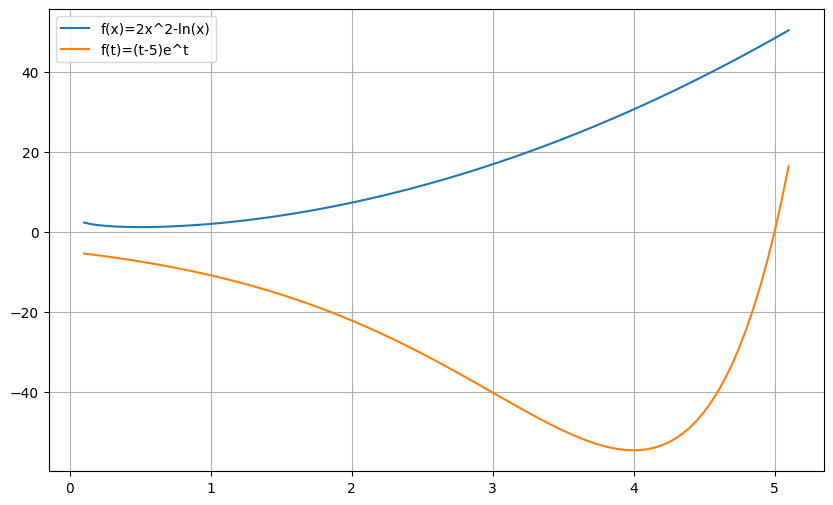

In [37]:
x = np.linspace(0.1, 5.1, 100)
y = f_x(x)
t = f_t(x)
plt.figure(figsize=(10,6))
plt.plot(x, y, label='f(x)=2x^2-ln(x)')
plt.plot(x, t, label ='f(t)=(t-5)e^t')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
x_dicho = dicho(epsilon, 0, 5, f_x)
t_dicho = dicho(epsilon, 0, 5, f_t)
x_dicho, t_dicho

((0.4999971389770508, 19), (4.000000953674316, 19))

Дихотомия дает результат, что точка минимума функции f(x) - xmin = 0.5, а функции f(t) - tmin = 4, на это понадобилось 19 итераций (чтобы добиться точности epsilon = 1e-5)

In [36]:
x_fibo = fibo(0, 5, 19, f_x)
t_fibo = fibo(0, 5, 19, f_t)
x_fibo, t_fibo

((0.500369549150037, 0.001478196600147863),
 (3.9999999999999996, 0.0014781966001473634))

При одинаковом количестве итераций (19) метод Фибоначчи дал тот же результат, только epsilon в данном случае порядка 1е-3, тогда как в дихотомии мы добивались точности в epsilon = 1e-5

А теперь используем встроенный метод:

In [43]:
from scipy.optimize import minimize_scalar

x_scipy = minimize_scalar(f_x).x
t_scipy = minimize_scalar(f_t).x
counts_x = minimize_scalar(f_x).nit
counts_t = minimize_scalar(f_t).nit
x_scipy, t_scipy, counts_x, counts_t

C:\Users\Матвей\AppData\Local\Temp\ipykernel_22964\2984882003.py:2: RuntimeWarning: divide by zero encountered in log
  return 2*x**2-np.log(x)


(0.49999999265002165, 3.999999984140814, 11, 10)

Результаты получились те же, только количество итераций меньше почти в два раза!

## Задание 3